<a href="https://colab.research.google.com/github/Momegaii/comuter_vision_cnn_rsi/blob/main/pixels_processor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

theory CS50 AI FUNDAMENTALS  :

https://www.youtube.com/watch?v=L1lQtyqpezI

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
filter_arr = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
print(filter_arr)

[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]


In [ ]:
threebythree_sens = [[0.09,0.13,0.08],[0.08,0.09,0.11],[0.10,0.87,0.94,]]

filter_arr = np.array(filter_arr)
threebythree_sens = np.array(threebythree_sens)

print(filter_arr)
print(threebythree_sens)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
[[0.09 0.13 0.08]
 [0.08 0.09 0.11]
 [0.1  0.87 0.94]]


Convolution

In [ ]:
line1 = threebythree_sens[0] * filter_arr[0]
line2 = threebythree_sens[1] * filter_arr[1]
line3 = threebythree_sens[2] * filter_arr[2]

print('line1')
print(line1)
print('line2')
print(line2)
print('line3')
print(line3)

comb=line1+line2+line3
comb = np.array(comb)
print('comb')
print(comb[0]+comb[1]+comb[2])

line1
[-0.09 -0.13 -0.08]
line2
[-0.08  0.72 -0.11]
line3
[-0.1  -0.87 -0.94]
comb
-1.68


# cv

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload chart.zip from your local machine


Saving chart.zip to chart.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_dir = "/content/drive/My Drive/chart"  # Update path if needed

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

from torchvision import datasets
from torch.utils.data import DataLoader

train_dataset = datasets.ImageFolder(data_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

print("Classes:", train_dataset.classes)
print("Total samples:", len(train_dataset))


# Model
class ChartCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(32 * 16 * 16, 64), nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.net(x)

device = torch.device("cpu")
model = ChartCNN().to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, loader, epochs=20):
    model.train()
    for epoch in range(epochs):
        total_loss, correct, total = 0, 0, 0
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            out = model(imgs)
            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += (out.argmax(1) == labels).sum().item()
            total += labels.size(0)
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Accuracy: {correct/total:.2%}")

train(model, train_loader)


Classes: ['sucessful', 'unsucessful']
Total samples: 8
Epoch 1, Loss: 0.7109, Accuracy: 37.50%
Epoch 2, Loss: 0.7610, Accuracy: 62.50%
Epoch 3, Loss: 0.6966, Accuracy: 62.50%
Epoch 4, Loss: 0.6608, Accuracy: 62.50%
Epoch 5, Loss: 0.6773, Accuracy: 62.50%
Epoch 6, Loss: 0.6912, Accuracy: 62.50%
Epoch 7, Loss: 0.6884, Accuracy: 62.50%
Epoch 8, Loss: 0.6777, Accuracy: 62.50%
Epoch 9, Loss: 0.6674, Accuracy: 62.50%
Epoch 10, Loss: 0.6616, Accuracy: 62.50%
Epoch 11, Loss: 0.6609, Accuracy: 62.50%
Epoch 12, Loss: 0.6633, Accuracy: 62.50%
Epoch 13, Loss: 0.6660, Accuracy: 62.50%
Epoch 14, Loss: 0.6665, Accuracy: 62.50%
Epoch 15, Loss: 0.6648, Accuracy: 62.50%
Epoch 16, Loss: 0.6623, Accuracy: 62.50%
Epoch 17, Loss: 0.6605, Accuracy: 62.50%
Epoch 18, Loss: 0.6602, Accuracy: 62.50%
Epoch 19, Loss: 0.6607, Accuracy: 62.50%
Epoch 20, Loss: 0.6616, Accuracy: 62.50%


In [ ]:
test_img_path = "/content/drive/MyDrive/test.JPG"  # Or any valid image path
test_img_path2 = "/content/drive/MyDrive/test2.JPG"  # Or any valid image path


In [ ]:
from PIL import Image
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])


# Load and transform the image
img = Image.open(test_img_path)
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Load and transform the image
img2 = Image.open(test_img_path2)
img_tensor2 = transform(img2).unsqueeze(0)  # Add batch dimension

In [ ]:
model.eval()  # Set to evaluation mode

with torch.no_grad():
    output = model(img_tensor2)
    predicted_class = torch.argmax(output, dim=1).item()
    class_name = train_dataset.classes[predicted_class]
    print(f"🧠 Prediction: {class_name}")


🧠 Prediction: sucessful


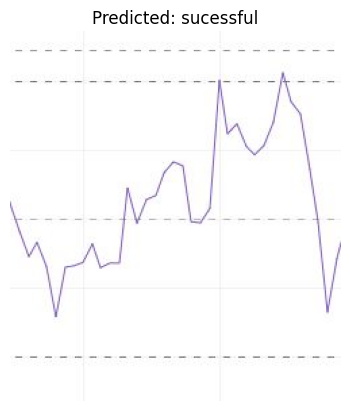

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img2, cmap='gray')
plt.title(f"Predicted: {class_name}")
plt.axis('off')
plt.show()


In [ ]:
torch.save(model.state_dict(), "/content/drive/My Drive/chart_cnn.pth")
